### **Name: Manuj Kumar Joshi**


### **Status : Intern**

### **Organisation : The Sparks Foundation**


### **Task 1 : Prediction using Supervised Learning**



<div class="alert alert-block alert-info" style="margin-top: 20px">
     Question : Predict the Percentage of marks of a student based on the number of study hours
</div>

### **Approach : As here have two features, one is a dependent variable and other is independent variable so we will use Simple Linear Regression Techniques of Supervised Learning in this**

<h3>Step 1 : Importing the Libraries</h3>

In [166]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

<h3> Step 2 :  Reading data from remote link and converting into DataFrame</h3>

In [167]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<h3> Step 3 : Visualizing the dataset</h3>

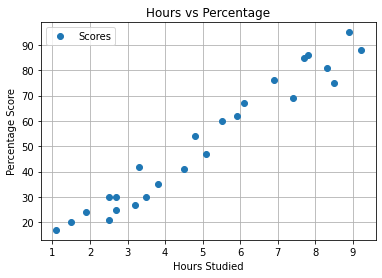

In [168]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

<h3> Step 4 : We can find Correlation to see the relation between variables.</h3>

A value of exactly 1.0 means there is a perfect positive relationship between the two variables. For a positive increase in one variable, there is also a positive increase in the second variable. A value of -1.0 means there is a perfect negative relationship between the two variables. This shows that the variables move in opposite directions - for a positive increase in one variable, there is a decrease in the second variable. If the correlation between two variables is 0, there is no linear relationship between them.

In [149]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


.976191 is a good indicator to say we have a positive relationship between the two variables, great we are good to go

<h3> Step 5 : Preparing the Dataset</h3>

In [169]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [170]:
X = df['Hours']
y = df['Scores']

In [171]:
X.shape

(25,)

In [172]:
y.shape

(25,)

<h3> Step 6: The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method</h3>

In [174]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [175]:
X_train.shape

(20,)

In [176]:
X_test.shape

(5,)

In [177]:
y_train.shape

(20,)

In [178]:
y_test.shape

(5,)

In [179]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [180]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


<h3> Step 7: Now its time to train our model</h3>

In [181]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


Printing the coffecient and Intercept of the model after training

In [182]:
print(regressor.coef_)
print(regressor.intercept_)

[9.91065648]
2.018160041434683


<h3>Step 8 : Visualizing the model</h3>

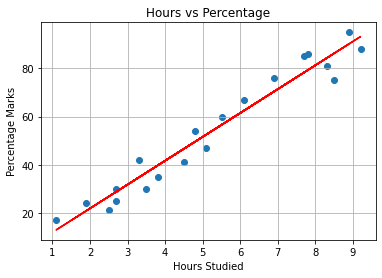

In [183]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Scatter plot for the train data
plt.scatter(X_train, y_train)
plt.plot(X, line,color='red')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Marks')
plt.grid()
plt.show()

<h3>Step 9 : Making Predictions</h3>

In [184]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


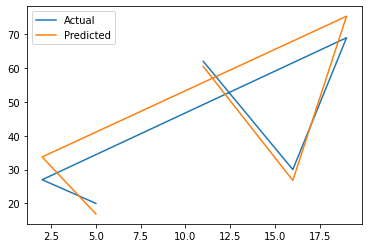

In [185]:
# Comparing Actual vs Predicted
comp= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comp.plot() 

<h3>So now, you can also test with your own data</h3>

In [186]:
hours = float(input('Enter number of hours studied'))
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter number of hours studied 9.25


No of Hours = 9.25
Predicted Score = 93.69173248737538


<h3>Step 10 : Evaluating your model</h3>

In [187]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


<h3>Inference : for 9.25 hours of study percentage expected is 93.69% approx</h3>